# Collecte des données : Prix du carburant

Le prix du carburant en région parisienne a pu avoir un effet non négligeable, surtout en 2022, sur le trafic à Paris. Les données récupérées proviennent du site officiel du gouvernement, à savoir : [https://www.prix-carburants.gouv.fr/rubrique/opendata/](https://www.prix-carburants.gouv.fr/rubrique/opendata/).

Ce notebook vise à extraire de ces données le prix moyen du carburant en région parisienne (départements 75, 92, 93 et 94) pour chaque jour entre le 1er novembre 2021 et le 9 décembre 2022.

## Import des modules nécessaires

In [241]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as Xet

## Extraction des données du XML

#### 2022

In [242]:
# On extrait les données pertinentes du fichier XML de 2022

cols = ['id_station', 'code_postal', 'carburant', 'date_heure', 'prix']

xmlparse = Xet.parse('PrixCarburants_annuel_2022.xml')
root = xmlparse.getroot()

id_station_list = []
cp_list = []

carburant_list = []
date_heure_list = []
prix_list = []
    
for pdv in root.iter('pdv'):
    id_station = pdv.attrib.get('id')
    cp = pdv.attrib.get('cp')
    
    id_station_list.append(id_station)
    cp_list.append(cp)

for pr in root.iter('prix'):
    carburant = pr.attrib.get('nom')
    date_heure = pr.attrib.get('maj')
    prix = pr.attrib.get('valeur')
    
    carburant_list.append(carburant)
    date_heure_list.append(date_heure)
    prix_list.append(prix)
    
all_items = [[id_station, cp, carburant, date_heure, prix] for id_station, cp, carburant, date_heure, prix in 
              zip(id_station_list, cp_list, carburant_list, date_heure_list, prix_list)]
    
df_22 = pd.DataFrame(all_items, columns=cols)

In [243]:
# On garde uniquement les données concernant les départements 75, 92, 93 et 94
df_22 = df_22[df_22['code_postal'].apply(lambda row: row[:2]).str.contains('75|92|93|94')]

# On transforme la colonne 'date_heure' en format datetime
df_22['date_heure'] = pd.to_datetime(df_22['date_heure'], format='%Y-%m-%d %H:%M:%S')

# On convertit la colonne des prix en float et on corrige le prix
df_22['prix'] = df_22['prix'].astype(float)

# On drop la colonne 'code_postal'
df_22 = df_22.drop('code_postal', axis=1)

In [244]:
# On extrait les données pertinentes du fichier XML de 2021

cols = ['id_station', 'code_postal', 'carburant', 'date_heure', 'prix']

xmlparse = Xet.parse('PrixCarburants_annuel_2021.xml')
root = xmlparse.getroot()

id_station_list = []
cp_list = []

carburant_list = []
date_heure_list = []
prix_list = []
    
for pdv in root.iter('pdv'):
    id_station = pdv.attrib.get('id')
    cp = pdv.attrib.get('cp')
    
    id_station_list.append(id_station)
    cp_list.append(cp)

for pr in root.iter('prix'):
    carburant = pr.attrib.get('nom')
    date_heure = pr.attrib.get('maj')
    prix = pr.attrib.get('valeur')
    
    carburant_list.append(carburant)
    date_heure_list.append(date_heure)
    prix_list.append(prix)
    
all_items = [[id_station, cp, carburant, date_heure, prix] for id_station, cp, carburant, date_heure, prix in 
              zip(id_station_list, cp_list, carburant_list, date_heure_list, prix_list)]
    
df_21 = pd.DataFrame(all_items, columns=cols)

In [245]:
# On conserve uniquement les données à partir du 1er novembre 2021
df_21['date_heure'] = pd.to_datetime(df_21['date_heure'], format='%Y-%m-%d %H:%M:%S')
df_21 = df_21[df_21['date_heure'] >= '2021-11-01 00:00:00']

# On transforme la colonne 'date_heure' en format datetime
df_21['date_heure'] = pd.to_datetime(df_21['date_heure'], format='%Y-%m-%d %H:%M:%S')

# On convertit la colonne des prix en float et on corrige le prix
df_21['prix'] = df_21['prix'].astype(float)/1000

# On garde uniquement les données concernant les départements 75, 92, 93 et 94
df_21 = df_21[df_21['code_postal'].apply(lambda row: row[:2]).str.contains('75|92|93|94')]

# On drop la colonne 'code_postal'
df_21 = df_21.drop('code_postal', axis=1)

In [246]:
# On concatène les deux DataFrames pour avoir les données sur toute la durée considérée
df = pd.concat([df_21, df_22], sort=True)

In [248]:
# On crée une colonne 'date'
df['date'] = df['date_heure'].astype(str).apply(lambda row: row[:10])
df = df[df['date'].notna()]

df = df.drop(['id_station', 'carburant', 'date_heure'], axis=1)

In [249]:
# On calcule le prix moyen du carburant pour chaque jour
df_ = df.groupby('date').mean()[['prix']]
df_ = df_.reset_index()

df_ = df_.rename(columns={'date': 'Date', 'prix': 'Prix du carburant'})

df_

,Date,Prix du carburant
0,2021-11-03,1.590400
1,2021-11-04,1.595000
2,2021-11-05,1.580000
3,2021-11-06,1.586333
4,2021-11-08,1.591667
5,2021-11-09,1.613500
6,2021-11-10,1.538000
7,2021-11-13,1.587333
8,2021-11-15,1.594000
9,2021-11-17,1.592333


In [250]:
df_['Date'] = pd.to_datetime(df_['Date'])

In [262]:
# Afin d'obtenir les dates manquantes ainsi qu'une interpolation de leur prix correspondant
dates = pd.date_range(start='2021-11-01', end=df_['Date'].max())

# DataFrame avec toutes les dates
temp_df = pd.DataFrame({'Date': dates})

result = pd.merge(temp_df, df_, on='Date', how='left')

# Imputation des valeurs des prix manquants avec interpolation linéaire
result['Prix du carburant'] = result['Prix du carburant'].interpolate()

In [267]:
result

,Date,Prix du carburant
0,2021-11-01,1.590400
1,2021-11-02,1.590400
2,2021-11-03,1.590400
3,2021-11-04,1.595000
4,2021-11-05,1.580000
5,2021-11-06,1.586333
6,2021-11-07,1.589000
7,2021-11-08,1.591667
8,2021-11-09,1.613500
9,2021-11-10,1.538000


## Visualisation

(array([18932, 18962, 18993, 19024, 19052, 19083, 19113, 19144, 19174,
        19205, 19236, 19266, 19297, 19327, 19332]),
 <a list of 15 Text xticklabel objects>)

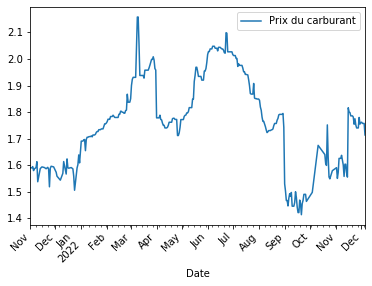

In [268]:
import matplotlib.pyplot as plt

result.plot(x='Date', y='Prix du carburant')
plt.xticks(rotation=45, ha="right")

## Ajout des données à la base de données principale

In [269]:
data = pd.read_csv('data/bdd_finale.csv')

data['Date'] = data['Date et heure de comptage'].apply(lambda row: row[:10])
data['Date'] = pd.to_datetime(data['Date'])

df_final = data.merge(result, on='Date', how='left')
df_final = df_final.drop('Date', axis=1)

df_final

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc_Barré,Etat arc_Invalide,Jour férié,Jour de la semaine_0,Jour de la semaine_1,...,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,is_day,paris_repsire,perturbation_travaux,Prix du carburant
0,AV_Champs_Elysees,2022-01-01 11:00:00,524.000000,8.856670,1,0,1,1,0,0,...,4,12,8,11,16,11,True,False,0.0,1.691000
1,AV_Champs_Elysees,2022-01-01 07:00:00,491.000000,7.716110,1,0,1,1,0,0,...,9,9,8,8,16,8,False,False,0.0,1.691000
2,AV_Champs_Elysees,2022-01-01 19:00:00,997.000000,46.288890,3,0,1,1,0,0,...,19,11,7,11,16,11,False,False,0.0,1.691000
3,AV_Champs_Elysees,2022-01-01 18:00:00,1096.000000,46.602220,3,0,1,1,0,0,...,21,12,7,11,15,11,False,False,0.0,1.691000
4,AV_Champs_Elysees,2022-01-01 09:00:00,258.000000,3.754450,1,0,1,1,0,0,...,7,9,8,8,18,8,True,False,0.0,1.691000
5,AV_Champs_Elysees,2022-01-01 16:00:00,1191.000000,35.554450,3,0,1,1,0,0,...,10,14,8,13,12,13,True,False,0.0,1.691000
6,AV_Champs_Elysees,2022-01-01 04:00:00,500.000000,67.081110,4,0,1,1,0,0,...,19,10,9,9,16,9,False,False,0.0,1.691000
7,AV_Champs_Elysees,2022-01-01 21:00:00,976.000000,43.191670,3,0,1,1,0,0,...,15,11,6,10,19,10,False,False,0.0,1.691000
8,AV_Champs_Elysees,2021-12-14 00:00:00,1024.000000,13.062780,1,0,1,0,0,1,...,27,6,5,5,12,5,False,False,0.0,1.567000
9,AV_Champs_Elysees,2021-12-13 23:00:00,1141.000000,17.648340,2,0,1,0,1,0,...,23,6,5,5,12,5,False,False,0.0,1.584000


In [271]:
df_final.to_csv('final_data.csv', sep=';')